In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
data = {}
X = []
Y = []
for folder in os.listdir('20_newsgroups'):
    for file in os.listdir(os.path.join('20_newsgroups',folder)):
        with open(os.path.join('20_newsgroups',folder,file) , "r") as f:
            X.append((file , f.read()))
            Y.append(folder)

In [3]:
#extraction of words from the document

#Step 1-create an array of stop words
#Remove puctuation from the word list

from nltk.corpus import stopwords
from string import punctuation

stopwords = list(stopwords.words('english'))
stopwords += list(punctuation)
stopwords +=  ['subject:','from:', 'date:', 'newsgroups:', 'message-id:', 'lines:', 'path:', 'organization:', 
            'would', 'writes:', 'references:', 'article', 'sender:', 'nntp-posting-host:', 'people', 
            'university', 'think', 'xref:', 'cantaloupe.srv.cs.cmu.edu', 'could', 'distribution:', 'first', 
            'anyone','world', 'really', 'since', 'right', 'believe', 'still', 'keywords','expires','approved'
            ,'archive','name','to:','or:','telephone:','fax:','reply-to:',"that's",'followup-to:',"we're",
            "let's", "what's","max>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'","going","using",]

In [4]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

lemmatizer = WordNetLemmatizer()

In [5]:
from nltk.corpus import wordnet
def get_simple_pos(tag):
    
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [6]:
#Removing stop words from words list

def filter_words(words):
    useful_words = [w for w in words if w not in stopwords]
    words2 = []
    for i in useful_words:
        pos = pos_tag([i])
        clean_word = lemmatizer.lemmatize(i, pos = get_simple_pos(pos[0][1]))
        words2.append(clean_word.lower())
    return words2

In [7]:
#converting sentences into tokens
from nltk.tokenize import word_tokenize

documents = []
for i in range(len(X)):
    words = word_tokenize(X[i][1].lower())
    useful_words = filter_words(words)
    documents.append(useful_words)
    #print(words)

In [8]:
len(documents)

19997

In [9]:
documents

[['xref',
  'alt.atheism:49960',
  'alt.atheism.moderated:713',
  'news.answers:7054',
  'alt.answers:126',
  'path',
  'crabapple.srv.cs.cmu.edu',
  'bb3.andrew.cmu.edu',
  'news.sei.cmu.edu',
  'cis.ohio-state.edu',
  'magnus.acs.ohio-state.edu',
  'usenet.ins.cwru.edu',
  'agate',
  'spool.mu.edu',
  'uunet',
  'pipex',
  'ibmpcug',
  'mantis',
  'mathew',
  'mathew',
  'mathew',
  'mantis.co.uk',
  'newsgroups',
  'alt.atheism',
  'alt.atheism.moderated',
  'news.answers',
  'alt.answers',
  'subject',
  'alt.atheism',
  'faq',
  'atheist',
  'resource',
  'summary',
  'book',
  'address',
  'music',
  '--',
  'anything',
  'related',
  'atheism',
  'faq',
  'atheism',
  'book',
  'music',
  'fiction',
  'address',
  'contact',
  'message-id',
  '19930329115719',
  'mantis.co.uk',
  'date',
  'mon',
  '29',
  'mar',
  '1993',
  '11:57:19',
  'gmt',
  'thu',
  '29',
  'apr',
  '1993',
  '11:57:19',
  'gmt',
  'followup-to',
  'alt.atheism',
  'distribution',
  'organization',
  'man

In [10]:
text_documents = [" ".join(document) for document in documents]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(text_documents, Y)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(max_features=6000)
x_train_features = vectorizer.fit_transform(x_train)

In [14]:
x_train_features.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
pd.DataFrame(x_train_features.toarray(), columns = vectorizer.get_feature_names())

00  000  0000  01  0100  02  03  04  040  0400  ...  zeus  zionism  \
0       0    0     0   0     0   0   0   0    0     1  ...     0        0   
1       0    0     0   0     0   1   0   0    0     0  ...     0        0   
2       0    0     0   0     0   0   0   0    0     0  ...     0        0   
3       0    0     0   1     0   1   0   0    0     0  ...     0        0   
4       0    0     0   0     0   0   1   0    0     0  ...     0        0   
...    ..  ...   ...  ..   ...  ..  ..  ..  ...   ...  ...   ...      ...   
14992   0    0     0   0     0   0   0   0    0     0  ...     2        0   
14993   0    0     0   0     0   0   0   1    0     1  ...     0        0   
14994   0    0     0   0     0   0   0   0    0     0  ...     0        0   
14995   0    0     0   0     0   0   0   1    0     0  ...     0        0   
14996   0    0     0   0     0   0   1   0    0     0  ...     0        0   

       zionist  zip  zone  zoo  zoology  zoom  zuma  zx  
0            0    0     0    0        0     0     0   0  
1            0    0     0    0        0     0     0   0  
2            0    0     0    0        0     0     0   0  
3            0    0     0    0        0     0     0   0  
4            0    0     0    0        0     0     0   0  
...        ...  ...   ...  ...      ...   ...   ...  ..  
14992        0    0     0    0        0     0     0   0  
14993        0    0     0    0        0     0     0   0  
14994        0    0     0    0        0     0     0   0  
14995        0    0     0    0        0     0     0   0  
14996        0    0     0    0        0     0     0   0  

[14997 rows x 6000 columns]

In [16]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '01',
 '0100',
 '02',
 '03',
 '04',
 '040',
 '0400',
 '05',
 '0500',
 '06',
 '0600',
 '07',
 '0700',
 '08',
 '09',
 '0d',
 '0el',
 '0g',
 '0i',
 '0m',
 '0q',
 '0t',
 '10',
 '100',
 '1000',
 '101',
 '102',
 '1024',
 '1024x768',
 '104',
 '105',
 '106',
 '107',
 '109',
 '11',
 '110',
 '111',
 '112',
 '114',
 '12',
 '120',
 '1200',
 '125',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '14',
 '140',
 '141',
 '144',
 '145',
 '146',
 '147',
 '15',
 '150',
 '1500',
 '16',
 '160',
 '17',
 '170',
 '175',
 '18',
 '180',
 '19',
 '1914',
 '1915',
 '1919',
 '192',
 '1920',
 '1964',
 '1967',
 '1970',
 '1972',
 '1975',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1993apr1',
 '1993apr10',
 '1993apr12',
 '1993apr13',
 '1993apr14',
 '1993apr15',
 '1993apr16',
 '1993apr17',
 '1993apr18',
 '1993apr19',
 '1993apr2',
 '1993apr20',
 '1993apr21

In [17]:
x_test_features = vectorizer.transform(x_test)

In [18]:
x_test_features.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
pd.DataFrame(x_test_features.toarray(), columns = vectorizer.get_feature_names())

00  000  0000  01  0100  02  03  04  040  0400  ...  zeus  zionism  \
0      0    0     0   0     0   0   0   0    0     0  ...     0        0   
1      0    0     0   0     0   0   0   0    0     0  ...     0        0   
2      0    0     0   0     0   0   0   0    0     0  ...     0        0   
3      0    0     0   0     0   0   0   0    0     0  ...     0        0   
4      0    0     0   0     0   0   0   0    0     0  ...     0        0   
...   ..  ...   ...  ..   ...  ..  ..  ..  ...   ...  ...   ...      ...   
4995   0    0     0   0     0   0   0   0    0     0  ...     0        0   
4996   0    0     0   0     0   0   0   0    0     0  ...     0        0   
4997   0    0     0   0     0   0   0   0    0     0  ...     0        0   
4998   0    0     0   0     0   0   0   0    0     0  ...     0        0   
4999   1    0     0   0     0   0   0   1    0     0  ...     0        0   

      zionist  zip  zone  zoo  zoology  zoom  zuma  zx  
0           0    0     0    0        0     0     0   0  
1           0    0     0    0        0     0     0   0  
2           0    0     0    0        0     0     0   0  
3           0    0     0    0        0     0     0   0  
4           0    0     0    0        0     0     0   0  
...       ...  ...   ...  ...      ...   ...   ...  ..  
4995        0    0     0    0        0     0     0   0  
4996        0    0     0    0        0     0     0   0  
4997        0    0     0    0        0     0     0   0  
4998        0    0     0    0        0     0     0   0  
4999        0    0     0    0        0     0     0   0  

[5000 rows x 6000 columns]

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train_features,y_train)
y_predict = NB_classifier.predict(x_test_features)

In [22]:
sklearn_score_train = NB_classifier.score(x_train_features,y_train)
print("Sklearn's score on training data :",sklearn_score_train)

Sklearn's score on training data : 0.8997799559911982


In [23]:
sklearn_score_test = NB_classifier.score(x_test_features,y_test)
print("Sklearn's score on testing data :",sklearn_score_test)

Sklearn's score on testing data : 0.8538


In [24]:
from sklearn.metrics import classification_report

print("Classification report for testing data :-")
print(classification_report(y_test, y_predict))

Classification report for testing data :-
                          precision    recall  f1-score   support

             alt.atheism       0.78      0.83      0.80       236
           comp.graphics       0.76      0.86      0.81       256
 comp.os.ms-windows.misc       0.97      0.27      0.42       241
comp.sys.ibm.pc.hardware       0.65      0.85      0.74       255
   comp.sys.mac.hardware       0.80      0.91      0.85       243
          comp.windows.x       0.78      0.81      0.79       249
            misc.forsale       0.78      0.90      0.84       258
               rec.autos       0.89      0.91      0.90       244
         rec.motorcycles       0.94      0.94      0.94       275
      rec.sport.baseball       0.96      0.97      0.97       251
        rec.sport.hockey       0.98      0.95      0.96       239
               sci.crypt       0.98      0.96      0.97       241
         sci.electronics       0.81      0.91      0.86       244
                 sci.med       0.

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[196   0   0   0   0   0   0   2   1   0   0   0   1   0   0   0   1   2
    0  33]
 [  0 220   1  10   7   8   5   1   0   0   0   1   2   0   1   0   0   0
    0   0]
 [  0  26  64  79  11  44  11   0   0   0   0   0   5   0   1   0   0   0
    0   0]
 [  0   7   0 218  17   4   3   0   0   0   0   0   6   0   0   0   0   0
    0   0]
 [  0   3   0   9 221   0   6   0   0   0   0   0   4   0   0   0   0   0
    0   0]
 [  0  23   0   6   8 201   6   0   0   0   0   0   3   2   0   0   0   0
    0   0]
 [  0   0   0   6   4   0 232   5   4   0   1   0   5   0   0   0   0   0
    1   0]
 [  0   0   0   0   1   0   5 222   8   1   1   0   3   0   3   0   0   0
    0   0]
 [  0   0   0   0   0   0   6   7 259   1   0   0   2   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   4   2   0 244   1   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   1   1   6 227   0   0   1   0   0   1   0
    1   0]
 [  0   2   0   0   1   0   1   0   0   0   1 231   3   0   0   0

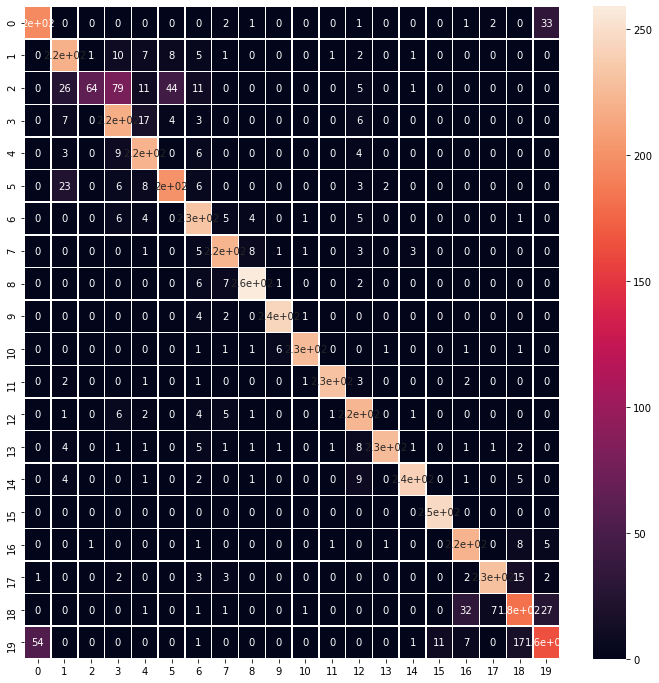

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize=(12,12))
sns.heatmap(cm,annot=True, linewidths=.5, ax=ax)